# <font color ="darkblue">Questões de Análise de Dados + Inteligência Artificial
</font>

---



---



## Materiais

**Anexo :** 

Para auxilio com as questões, disponibilizamos o livro *Python para Estatísticos*, do professor Telmo de Menezes e Silva Filho, do Departamento de Estatística da Universidade Federal da Paraíba (UFPB):

[**Python para Estatísticos**](https://tmfilho.github.io/pyestbook)

Link para bibliotecas essênciais para desenvolver os problemas abaixo:

[**Bibliotecas essenciais**](https://github.com/Manuelfjr/processo2fase_anexo)

Slides das aulas de Thais:  
  
[**Slides**](https://sites.google.com/site/gaudenciothaisia/home/aulas)

# Dados e enunciado para as questões 1, 2 e 3:
##### Data Set Information:

Attribute Information:

1) ID number  
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

*datapath: https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/breast-cancer-wisconsin.csv*
***
### Questão 1: Preparação do ambiente

**a)** Preparar o ambiente (Colab)  
**b)** Pegar os arquivos que vão utilizar na tarefa  
**c)** Utilizar o pandas para receber os dados  
**d)** Visualizar os Dados em Histogramas  

In [ ]:
# R:
#importação das bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Ao checar que a base de dados está no formato .csv, foi utilizado a função de leitura do pandas para este formato onde deve ser passado apenas o caminho onde está a base (path disponibilizado)
#Foi atribuído a uma variável df para realizar poder realizar operações futuras.
df1 = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/breast-cancer-wisconsin.csv")

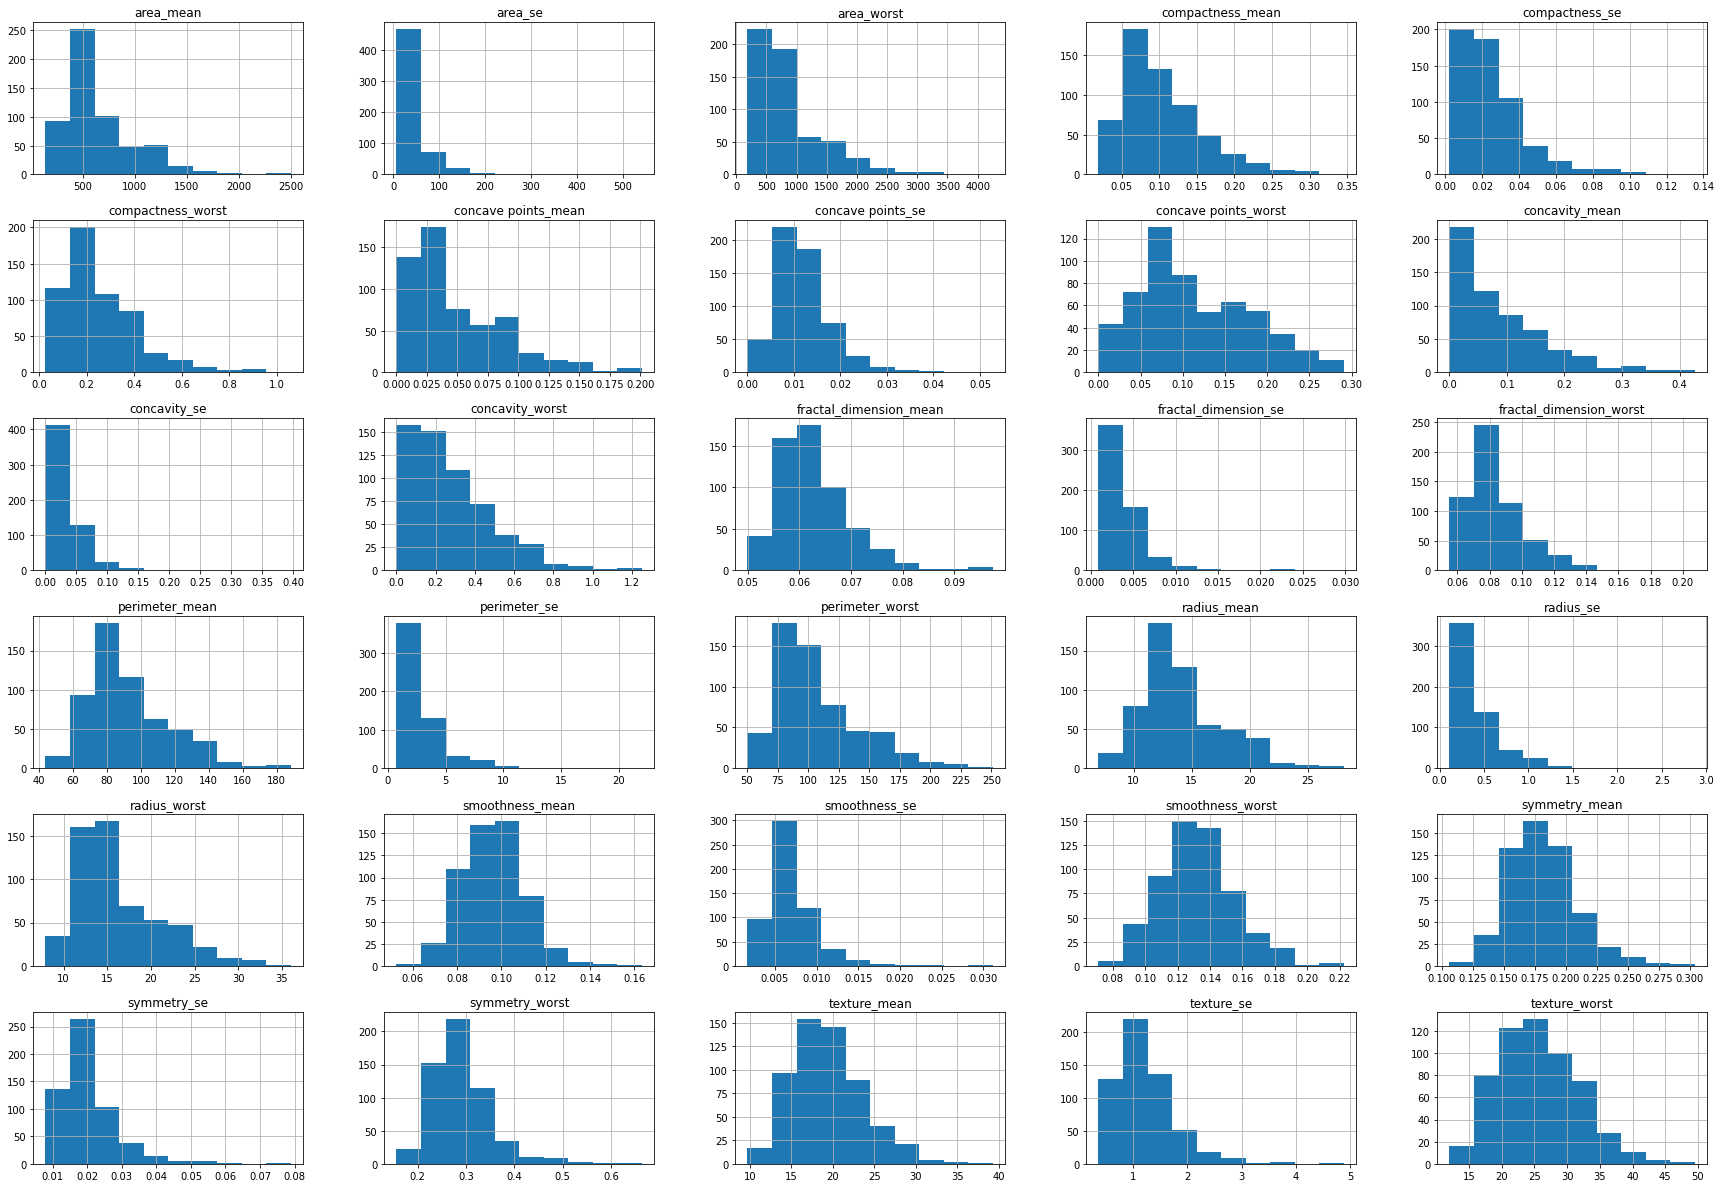

In [ ]:
#Visualização dos dados em Histogramas
#Como não faz sentido a visualização de histograma das colunas ID e dessa Unnamad:32 que está totalmente vazia, será excluido para esse processo de visualização
v = df1.copy()
v = v.drop(columns=['id', 'Unnamed: 32']) #operação de remoção das duas colunas citadas. Por padrão essa função retorna um dataframe com a atualização desejada e não altera o proprio dataframe
#Por isso, é necessário a operação de atribuição, mas como é uma cópia, pode mexer nela a vontade, pois df1 ainda tem o dataframe original.

v.hist(figsize=(30,21)); #Plotagem dos histogramas dos atributos restantes. Por padrão, se apenas plotar apenas, o tamanho fica muito pequena e um em cima do outro. Por isso, foi necessário ajeitar
#o parâmetro do tamanho de cada gráfico.


### Questão 2: Análise exploratória
**a)** Visualize os dados, detalhando cada coluna  
**b)** Extraia informações dos dados. Média, Moda, Mediana, Boxplot  
**c)** Visualize os valores únicos de uma determinada coluna  

In [ ]:
#Visualização dos dados como tabela
v

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Com a função info é possível identificar algumas informações específicas dos atributos do conjunto de dados.

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:

#Será calculado a média, mediana e moda para o primeiro conjunto de atributos (colunas 2 a 11) que se refere literalmente à média das características. O segundo e terceiro grupo se refere
#as mesmas características porém representando métricas diferentes e pode ser calculado exatamente da mesma forma que esses primeiros foram.

# 1-A coluna 'id' se remete ao número identificador do paciente e deve funcionar como chave primária na base de dados e dessa forma não faz sentido extrair informações de análise exploratória, tais como Média, Moda, Mediana, Boxplot.
    #O tipo dos dados dessa coluna é int64 que convertendo para tipo em python é int (inteiro). Além disso não há valores nulos, todas os registros estão preenchidos.
# 2-A coluna 'diagnosis' se remete ao diagnóstico recebido pelo paciente com base nos dados (se o tumor é maligno ou benigno).
    #O tipo dos dados dessa coluna é object que convertendo para tipo em python é String ou misturado. Além disso não há valores nulos, todas os registros estão preenchidos.

#Colunas com características do Tumor: coluna 2 a 11

# 3-A coluna 'radius_mean' se remete à média do raio atingido pelo tumor de determinado paciente.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
#Estatística Descritiva
media3 = df1['radius_mean'].mean()
mediana3 = df1['radius_mean'].median()
moda3 = df1['radius_mean'].mode()
print('\n\nAtributo 3:')
print('Média: '+ str(media3))
print('Mediana: '+ str(mediana3))
print('Moda: '+ str(moda3))
print('\n')

# 4-A coluna 'texture_mean' se remete à média dos desvios padrão dos valores em escala de cinza.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
media4 = df1['texture_mean'].mean()
mediana4 = df1['texture_mean'].median()
moda4 = df1['texture_mean'].mode()
print('Atributo 4:')
print('Média: '+ str(media4))
print('Mediana: '+ str(mediana4))
print('Moda: '+ str(moda4))
print('\n')

# 5-A coluna 'perimeter_mean' se remete à média dos perímetros do tumor de determinado paciente.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
media5 = df1['perimeter_mean'].mean()
mediana5 = df1['perimeter_mean'].median()
moda5 = df1['perimeter_mean'].mode()
print('Atributo 5:')
print('Média: '+ str(media5))
print('Mediana: '+ str(mediana5))
print('Moda: '+ str(moda5))
print('\n')

# 6-A coluna 'area_mean' se remete à média das áreas do tumor de determinado paciente.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
media6 = df1['area_mean'].mean()
mediana6 = df1['area_mean'].median()
moda6 = df1['area_mean'].mode()
print('Atributo 6:')
print('Média: '+ str(media6))
print('Mediana: '+ str(mediana6))
print('Moda: '+ str(moda6))
print('\n')

# 7-A coluna 'smoothness_mean' se remete à média do raio atingido pelo tumor de determinado paciente.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
media7 = df1['smoothness_mean'].mean()
mediana7 = df1['smoothness_mean'].median()
moda7 = df1['smoothness_mean'].mode()
print('Atributo 7:')
print('Média: '+ str(media7))
print('Mediana: '+ str(mediana7))
print('Moda: '+ str(moda7))
print('\n')

# 8-A coluna 'compactness_mean' se remete à média do raio atingido pelo tumor de determinado paciente.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
media8 = df1['compactness_mean'].mean()
mediana8 = df1['compactness_mean'].median()
moda8 = df1['compactness_mean'].mode()
print('Atributo 8:')
print('Média: '+ str(media8))
print('Mediana: '+ str(mediana8))
print('Moda: '+ str(moda8))
print('\n')

# 9-A coluna 'concavity_mean' se remete à média do raio atingido pelo tumor de determinado paciente.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
media9 = df1['concavity_mean'].mean()
mediana9 = df1['concavity_mean'].median()
moda9 = df1['concavity_mean'].mode()
print('Atributo 9:')
print('Média: '+ str(media9))
print('Mediana: '+ str(mediana9))
print('Moda: '+ str(moda9))
print('\n')

# 10-A coluna 'concave points_mean' se remete à média do raio atingido pelo tumor de determinado paciente.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
media10 = df1['concave points_mean'].mean()
mediana10 = df1['concave points_mean'].median()
moda10 = df1['concave points_mean'].mode()
print('Atributo 10:')
print('Média: '+ str(media10))
print('Mediana: '+ str(mediana10))
print('Moda: '+ str(moda10))
print('\n')

# 11-A coluna 'symmetry_mean' se remete à média do raio atingido pelo tumor de determinado paciente.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
media11 = df1['symmetry_mean'].mean()
mediana11 = df1['symmetry_mean'].median()
moda11 = df1['symmetry_mean'].mode()
print('Atributo 11:')
print('Média: '+ str(media11))
print('Mediana: '+ str(mediana11))
print('Moda: '+ str(moda11))
print('\n')

# 12-A coluna 'fractal_dimension_mean' se remete à média do raio atingido pelo tumor de determinado paciente.
    ##O tipo dos dados dessa coluna é float64 que convertendo para tipo em python é float (ponto flutuante). Além disso não há valores nulos, todas os registros estão preenchidos.
media12 = df1['fractal_dimension_mean'].mean()
mediana12 = df1['fractal_dimension_mean'].median()
moda12 = df1['fractal_dimension_mean'].mode()
print('Atributo 12:')
print('Média: '+ str(media12))
print('Mediana: '+ str(mediana12))
print('Moda: '+ str(moda12))
print('\n')


#Colunas terminadas em (_SE): Coluna 12 a 21
#As colunas que possuem '_se' no final indicam O Erro Padrão (Standard Error) de cada uma das variáveis das médias. Então se remetem à mesma coisa de significado real, porém para análise
#elas significam erro padrão e não a média.
#Todas elas possuem todos os registros completados, ou seja, sem valores vazios e todas pertencem ao tipo float64 do pandas que é número de ponto flutuante.


#Colunas terminadas em (worst): Coluna 22 a 31
#As colunas que possuem 'worst' no final indicam provavelmente a pior medida capturada de cada característica para um registro específico. As características são as mesmas das colunas passadas.
#Todas elas possuem todos os registros completados, ou seja, sem valores vazios e todas pertencem ao tipo float64 do pandas que é número de ponto flutuante.

#A última coluna é chamada de 'Unnamed: 32' também reconhecida como tipo float64 porém não é preenchida com nenhum dado e portanto não agrega valor algum no banco de dados.



Atributo 3:
Média: 14.127291739894563
Mediana: 13.37
Moda: 0    12.34
dtype: float64


Atributo 4:
Média: 19.28964850615117
Mediana: 18.84
Moda: 0    14.93
1    15.70
2    16.84
3    16.85
4    17.46
5    18.22
6    18.90
7    19.83
8    20.52
dtype: float64


Atributo 5:
Média: 91.96903339191566
Mediana: 86.24
Moda: 0     82.61
1     87.76
2    134.70
dtype: float64


Atributo 6:
Média: 654.8891036906857
Mediana: 551.1
Moda: 0    512.2
dtype: float64


Atributo 7:
Média: 0.096360281195079
Mediana: 0.09587000000000001
Moda: 0    0.1007
dtype: float64


Atributo 8:
Média: 0.10434098418277686
Mediana: 0.09262999999999999
Moda: 0    0.1147
1    0.1206
dtype: float64


Atributo 9:
Média: 0.08879931581722322
Mediana: 0.06154
Moda: 0    0.0
dtype: float64


Atributo 10:
Média: 0.048919145869947236
Mediana: 0.0335
Moda: 0    0.0
dtype: float64


Atributo 11:
Média: 0.181161862917399
Mediana: 0.1792
Moda: 0    0.1601
1    0.1714
2    0.1717
3    0.1769
4    0.1893
dtype: float64


Atributo 1

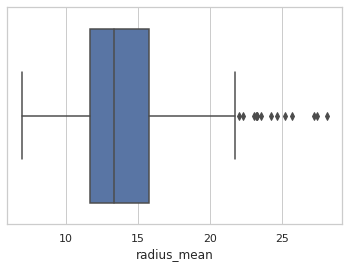

In [ ]:
#PLOTAGEM DOS 10 PRIMEIROS BOXPLOT (VARIAVEIS DE MÉDIA)
#Biblioteca usada foi o seaborn, pois é mais sensível aos olhos.
#Todos os 10 gráficos e boxplot foram gerados da mesma forma.



#Boxplot 3
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["radius_mean"])

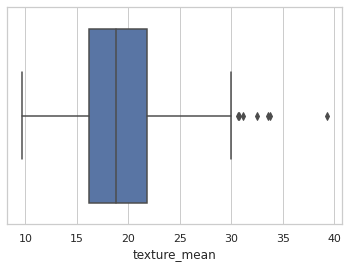

In [ ]:
#Boxplot 4
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["texture_mean"])

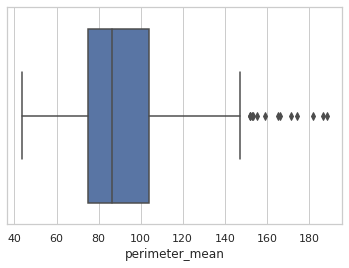

In [ ]:
#Boxplot 5
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["perimeter_mean"])

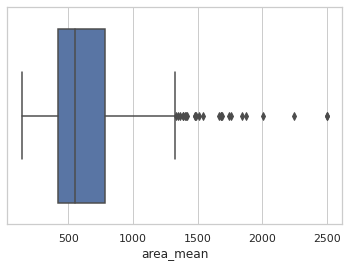

In [ ]:
#Boxplot 6
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["area_mean"])

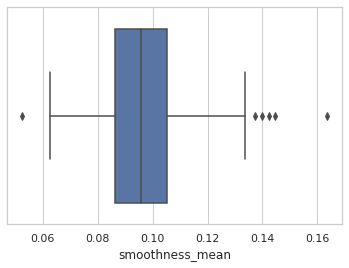

In [ ]:
#Boxplot 7
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["smoothness_mean"])

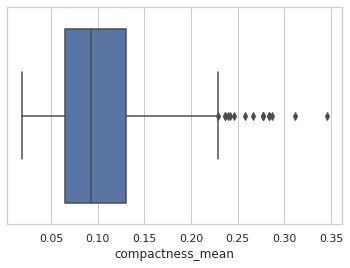

In [ ]:
#Boxplot 8
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["compactness_mean"])

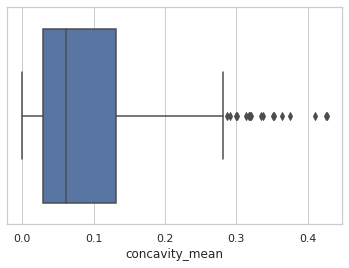

In [ ]:
#Boxplot 9
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["concavity_mean"])

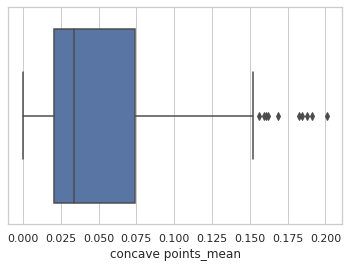

In [ ]:
#Boxplot 10
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["concave points_mean"])

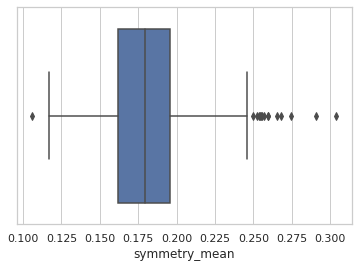

In [ ]:
#Boxplot 11
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["symmetry_mean"])

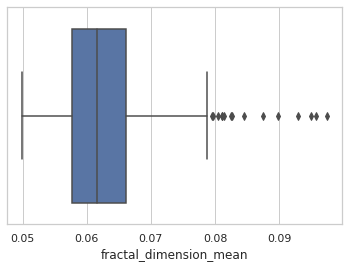

In [ ]:
#Boxplot 12
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["fractal_dimension_mean"])

In [ ]:
#Valores Únicos da Coluna 'perimeter_mean'
#Apenas foi chamado a função unique() para um determinado atributo
uniqueValues = df1['perimeter_mean'].unique()
print(uniqueValues)

[122.8  132.9  130.    77.58 135.1   82.57 119.6   90.2   87.5   83.97
 102.7  103.6  132.4  103.7   93.6   96.73  94.74 108.1   87.46  85.63
  60.34 102.5  137.2  110.   116.    97.41 122.1  102.4  115.   124.8
  77.93 112.8  127.9  107.   110.1   93.63  82.61  95.54  88.4   86.18
  71.9  128.3   87.32  85.42 123.7   51.71  85.98  78.04  86.91  74.72
  87.21  75.71 120.3   97.26  73.34 125.5   95.55  54.34  64.55  54.66
  96.42  59.2   82.69  97.4   60.11  71.8   58.79  81.37 123.6  114.2
  90.43  79.19 104.1   87.91 120.2  143.7   83.19  73.81  86.49 171.5
 129.1   76.95 121.1   94.25 122.    79.78  95.77  94.57 100.2   84.74
  86.6  100.3   77.79  62.11  74.34  94.48  88.05  43.79  77.22  63.95
  67.41  75.17  79.01 152.8   72.48  62.5   82.15  97.83  68.64  55.84
  76.53  58.74  98.64 105.7  121.4  166.2   94.28  86.1   88.44  87.76
 123.4   99.58 130.4   79.08 101.7  106.2  102.    81.72  73.06  96.85
  73.    61.24 105.1   73.66  83.74  68.26  78.11  78.99  97.84  93.97
  88.12  

***
### Questão 3: Construa gráficos para passar uma mensagem sobre a análise que foi feita

In [ ]:
# R:

#Como o atributo de diagnóstico pode ser considerado como atributo alvo, ou seja, a classificação após analise dos outros atributos, ela também precisa participar das funções
#e como dado categórico, há funções em que ela não aparece, como o mapa de correlação.
#Dessa forma, vai ser preciso transformar em dado numérico com um simples replace, onde B e M vira 0 e 1.

v['diagnosis'].replace(['M','B'], [1,0], inplace=True)
v
#É possível ver que não tem mais M e B no atributo 'diagnosis' e assim ele pode participar do mapa de correlação.


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


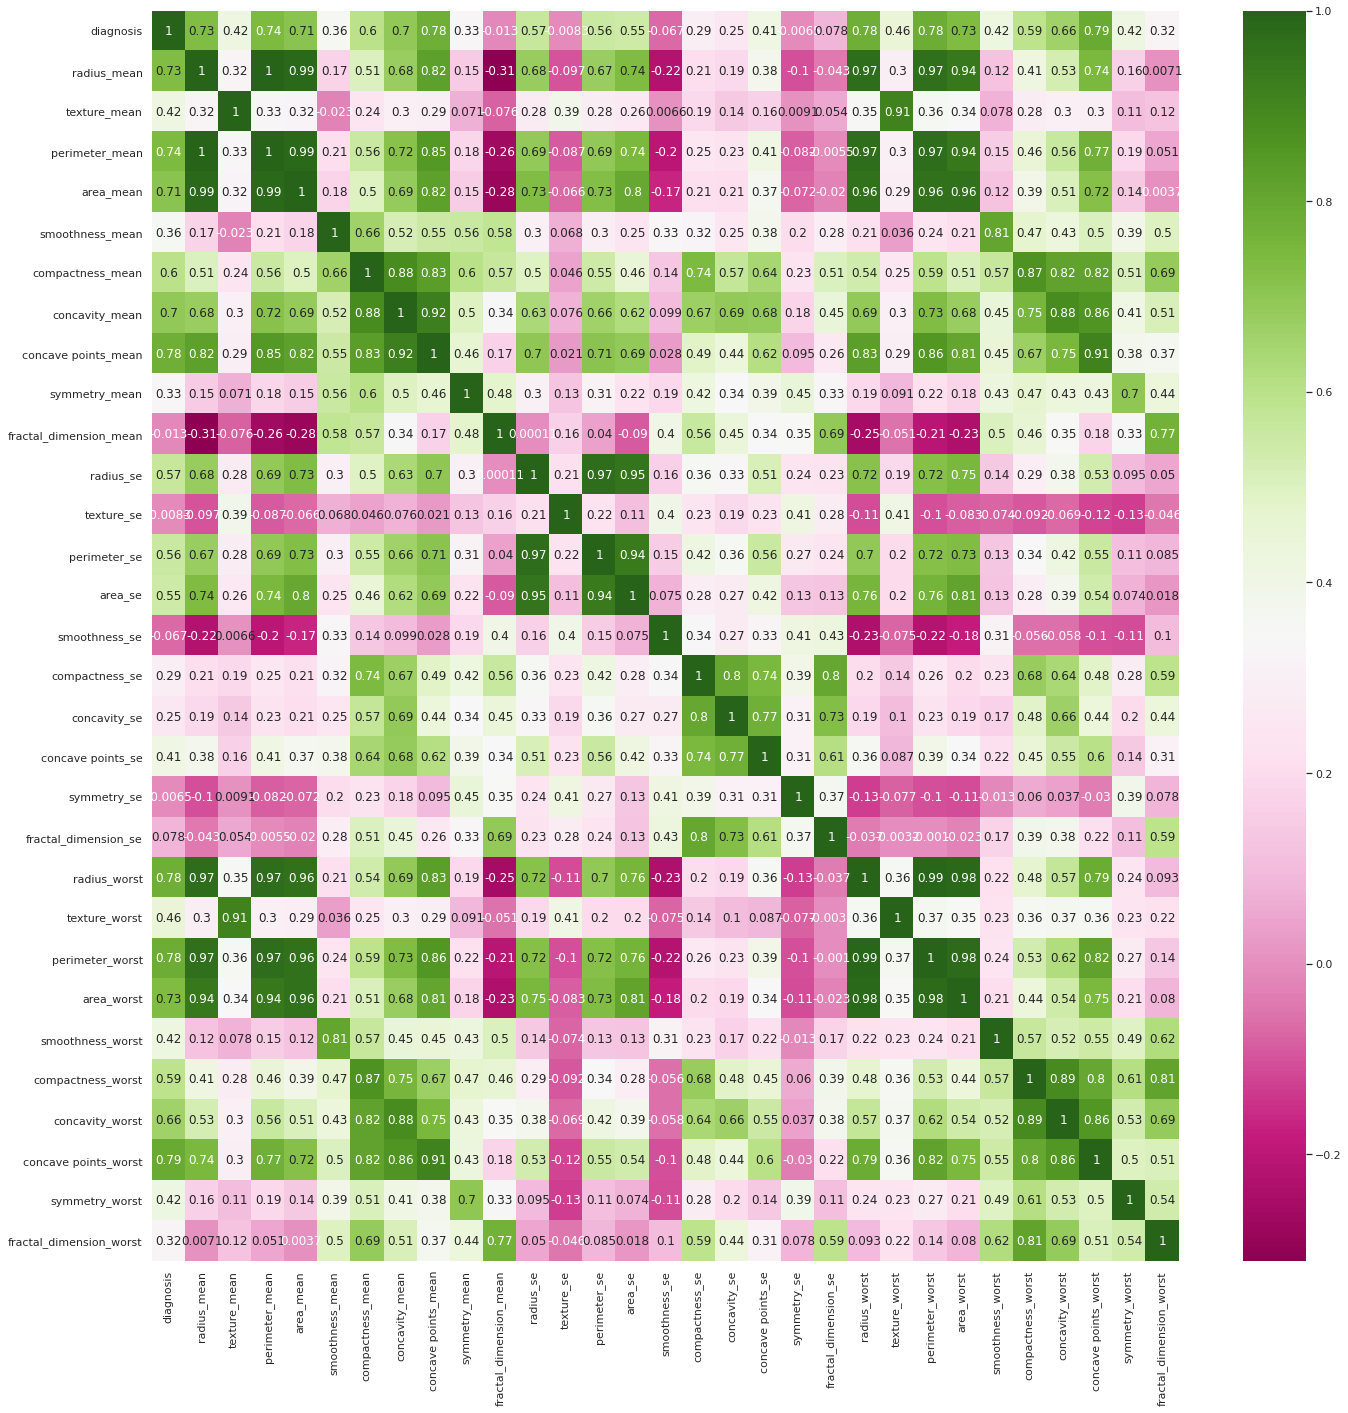

In [ ]:
# R:
#Primeiramente será trabalhado com a cópia do dataframe que já está com as duas colunas que não agregam informação retiradas.
#Mapa de correlação entre as variáveis para explorar cada atributo dois a dois.
#Como é possível ver, ao checar a correlação com o atributo alvo (dignosis), alguns outros atributos são bem correlacionados sendo atributos importantes para gerar o diagnóstico.
#O mais correlacionados são:  concave_points_worst, radius_worst, perimeter_worst e concave_points_mean. Mais para frente será um gráfico mostrando isso.
#Como a função do mapa de correlação de seaborn não tem o parâmetro de figsize, é preciso passar uma tupla com as dimensões via subplot que o retorno é aceito como parâmetro (ax).
fig, ax = plt.subplots(figsize=(23,23))
sns.heatmap(v.corr(), annot=True, cmap="PiYG",  ax=ax)

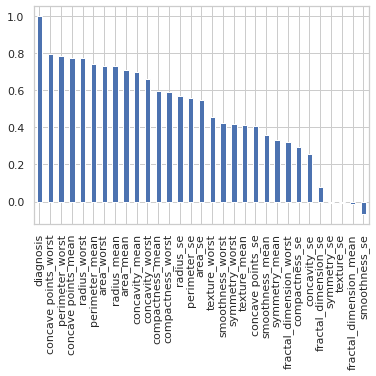

In [ ]:

#Gráfico mostrando a correlação dos outros atributos em relação ao diagnóstico, mostrando as variáveis mais importantes para a definição do mesmo.
#A primeira é 1 porque seria a 'diagnosis' com ela mesmo, a maior correlação e a partir disso está em ordem decrescente de correlação
graphCorrelation = v.corr()['diagnosis'].sort_values(ascending=False)
graphCorrelation.plot(kind='bar')


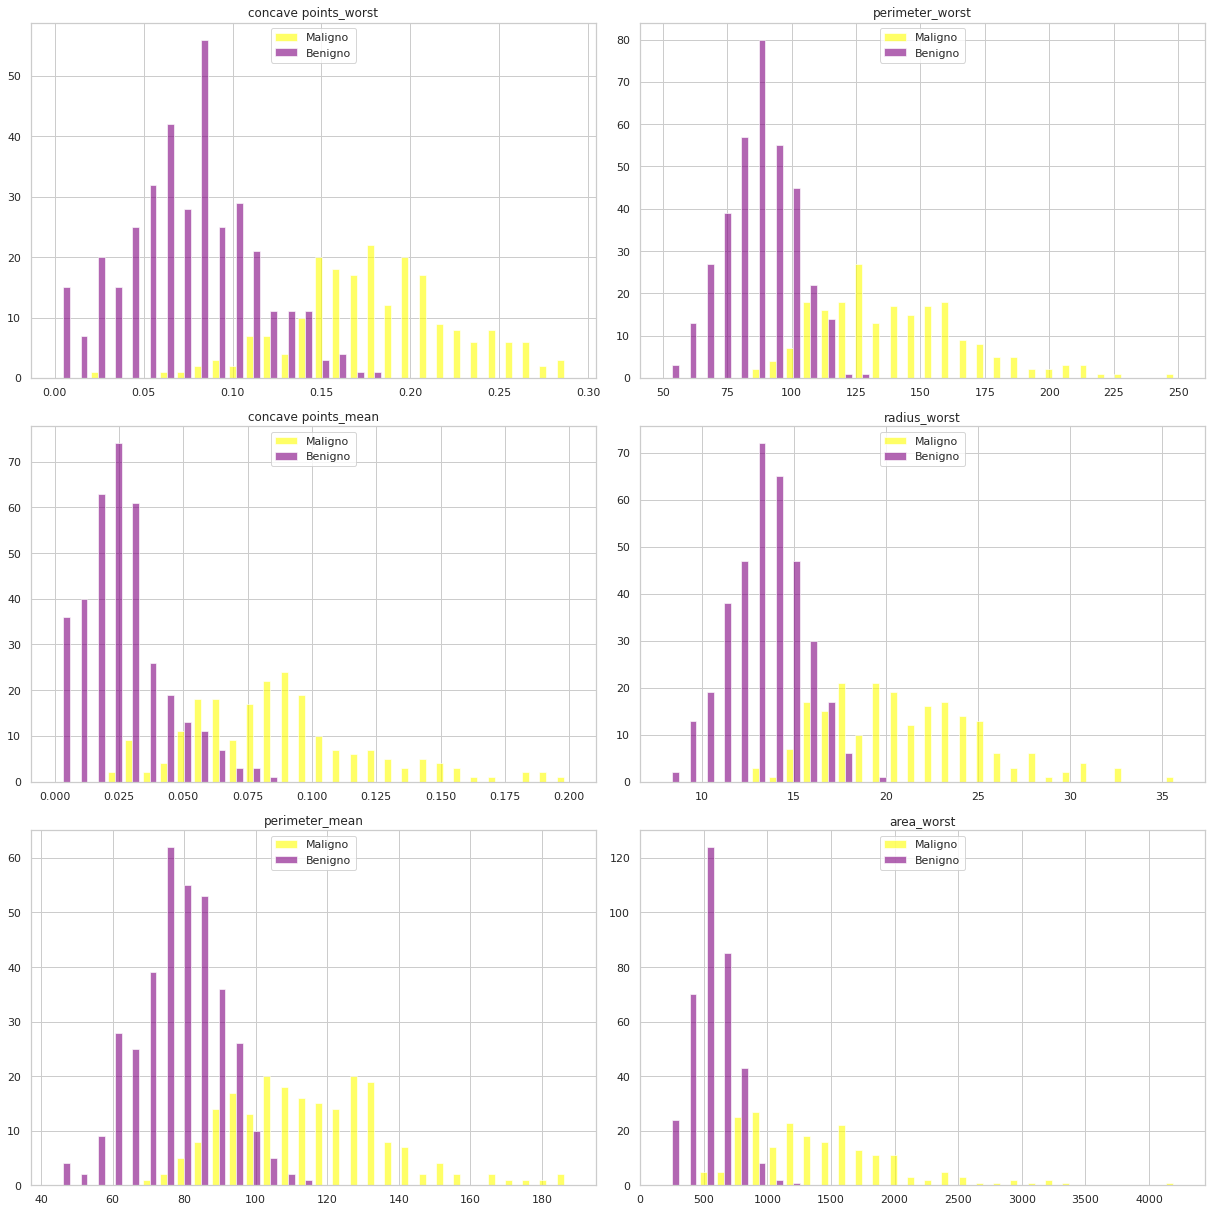

In [ ]:
#Pegando os 6 primeiros atributos mais importantes e observando o comportamento deles em relação às classes da classificação.

#Coletando as 6 variáveis mais importantes
importantVar = ["concave points_worst", "perimeter_worst", "concave points_mean", "radius_worst", "perimeter_mean", "area_worst"]

Maligno = v[v['diagnosis'] ==1] #Classe 1 
Benigno = v[v['diagnosis'] == 0]#Classe 2
#Como foi separado 6 variáveis, então serão 6 gráficos relacionados às 2 classes para ver o comportamento daquela variável nas duas classes.
#Como são 6 gráficos, serão 3 linhas, cada uma contendo 2 gráficos no tamanho passado.
plot, graphs = plt.subplots(nrows= 3, ncols= 2, figsize=(17,17))
graphs = graphs.flatten()
for i, graph in enumerate(graphs): #iterando sobre os 6 gráficos que foram retornados para preencher com os dados do atributo atual.
    graph.figure
    graph.hist([Maligno[importantVar[i]],Benigno[importantVar[i]]], bins=30, alpha=0.6, label=['Maligno','Benigno'], color=['yellow','purple']) #é bom utilizar cores que se destacam uma da outra
    graph.legend(loc='upper center') #localização da legenda
    graph.set_title(importantVar[i])
plt.tight_layout()


#É possível ver que os menores valores de TODOS os atributos importantes estão relacionadas ao Benigno, enquanto os maiores valores são predominantemente Maligno.
#O que faz sentido pois se as características físicas de um tumor são pequenas então significa que não está tão desenvolvido, ou seja, benigno.
#Portanto, confirma a importância dessas variáveis, pois conseguem separar bem as classes

***
### Questão 4: Leitura de gráficos
**Explique o que ocorre com os modelos treinados abaixo e identifique possíveis soluções para um melhor desempenho.**
![img](https://i.imgur.com/00SO2Xh.jpg?1)
![img](https://i.imgur.com/NS8Qc6f.png?1)

In [ ]:
# R:
#O primeiro modelo pode estar representando um modelo que apresenta Overfitting, ou seja, ele ficou muito ajustado aos dados de treinamento e pouco sensível à dados novos, podendo considerar
#que o modelo decorou os dados de treino ao invés de aprender com eles. É possível visualizar isso no gráfico ao perceber que a curva de perda da validação tem momentos de subida a medida
#que a curva de perda de treino continua diminuindo. Dessa forma, percebe-se a melhora nos dados de treino (adequação), enquanto em dados novos não ocorre isso (há pioradas na validação)

#O segundo modelo pode estar representando um modelo que apresente Underfitting, ou seja, pois é possível enxergar que ambas as curvas de perda continuam a diminuir
#do começo até o final, o que indica que o treinamento foi parado bem cedo e o modelo possui capacidade de aprender mais. Uma forma de reduzir o underfitting
#é aumentar o número de épocas de treinamento para o modelo conseguir aprender mais.

#Portanto, é necessário que tanto o overfitting quanto o underfitting sejam evitados. Dessa forma, como um está relacionado a treinar bastante a ponto que os dados se adequem e o outro está
#relacionado a treinar de menos, então é necessário encontrar um meio termo, porém é um espaço muito curto. Existem algumas técnicas chamadas regularizadores. O Dropout é uma dessas e é usada para
#reduzir overfitting e nela é feita uma escolha aleatória de alguns neurônios na etapa de treinamento para serem desconsiderados em cada iteração. Isso faz com que a rede fique menos
#dependente dos dados e menos dependente da organização dos neurônios, pois como a cada iteração diferentes neurônios são desconsiderados, permite que a rede tenha diferentes canais de aprendizado,
#pois ao desconsiderar os neurônios, suas ligações também são cortadas formando outros "caminhos".

***
# Dados e enunciado para questão 5, 6 e 7:

***   
## Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

*datapath: https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv*
***

### Questão 5: Organização dos dados

**a)** Através de uma biblioteca, receba os dados e explore-os  
**b)** Plote gráficos que descrevam como se comportam as distribuições das colunas

In [ ]:
# R:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Recebimento dos dados através de uma função da biblioteca pandas.
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#Com a função describe é possível visualizar alguns detalhes específicos de cada atributo do conjunto de dados, como a média, desvio padrão, valor minimo e maximo e os intervalos dos quartis
#min - 25% - 50% - 75% - max

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Contagem de registros por classe. É possível ver um grande desequilibrio nesse atributo, onde apenas há 5 registros classificados como 'Island'
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

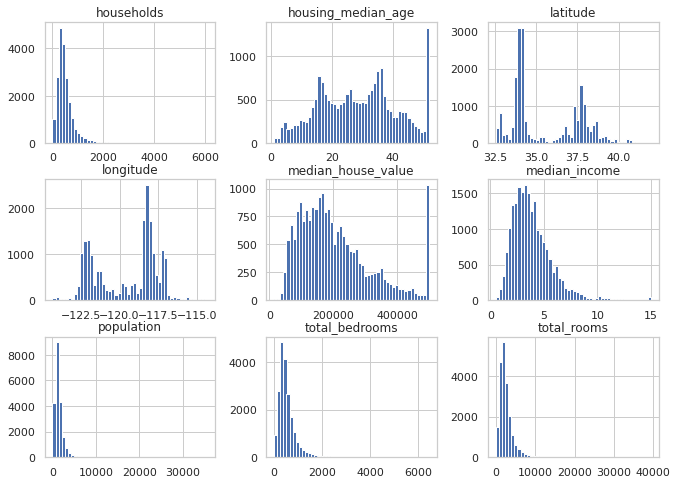

In [ ]:
#Histogramas que mostram a Distribuição dos dados dos atributos.
#É possível ver que os dados de alguns atributos possuem distribuições semelhantes o que pode demonstrar correlação alta.
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(11,8))
plt.show()

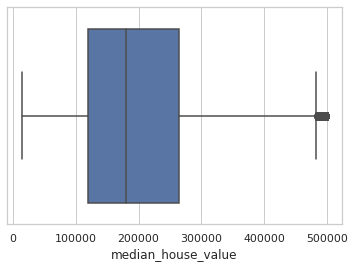

In [ ]:
#BoxPLot do valor médio dos imóveis.
#Há pontos fora dos limites mas não tão discrepante.
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["median_house_value"])

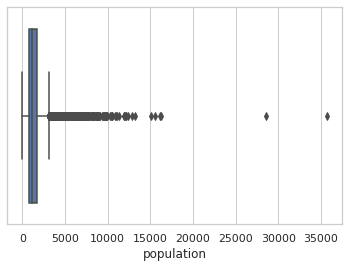

In [ ]:
#Já aqui, é possível visualizar alguns valores bem discrepantes (outliers) no atributo de população. Dois pontos muito distantes dos outros.

sns.set(style="whitegrid")
ax = sns.boxplot(x=df["population"])

[]

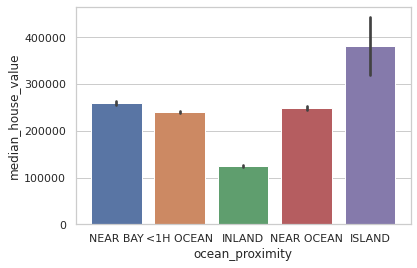

In [ ]:
#Gráfico de Barra: Proximidade do Oceado X População.
#Imóveis em ilhas costumam ter um valor médio bem mais elevado que os demais, mesmo tendo apenas 5 registros.
grafico1 = sns.barplot(data=df, x= df['ocean_proximity'], y= df['median_house_value'])
grafico1.plot()


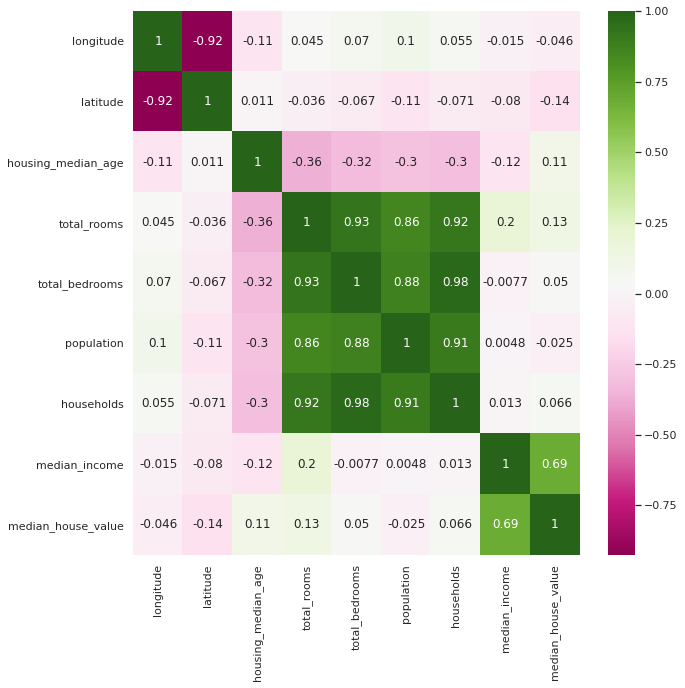

In [ ]:
#Mapa de Correlação que mostra o comportamento e grau de dependência dos atributos dois a dois
#Pode-se perceber que total_rooms, total_bedrooms, population e households possuem forte correlação positiva entre si pois os valores são proximos de 1.
#Porém o atributo que mais correlaciona com o preço do imóvel é a média do salário.
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="PiYG", ax=ax)

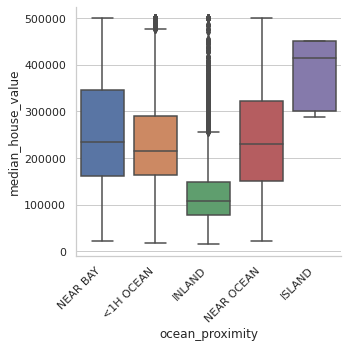

In [ ]:
g = sns.catplot(x="ocean_proximity", y="median_house_value", kind="box", data=df);
g.set_xticklabels(rotation=45, horizontalalignment='right') #ajeitar os labels do eixo X que estavam um em cima do outro atrapalhando a leitura, então foi rotacionado em 45° e alinhado a direita
plt.tight_layout()

#O preço médio das casas que se encontram em Ilhas são bem mais caras do que as outras localidades
#Inland é a classificação que possui mais outliers.

***
### Questão 6: Feature Engineering e lidando com dados categorizados

**a)** Crie uma nova coluna a partir de uma ou mais colunas  
**b)** Encontre uma forma de representar os dados categóricos em forma numérica


In [ ]:
# R:
#É possível criar uma nova coluna com base na média da idade das casas, informando se ela é Recente, antiga ou Muito antiga. Isso diminui a discrepancia dos valores das idades.

import numpy as np

df['status_age'] =  df['housing_median_age']

#Já vai ser substituído a categoria recente, antiga e muito antiga por 1,2 e 3, respectivamente para não ficar um dado categórico.
#Utilizando da função .mask() do pandas ele faz a substituição pelo 2° parametro, caso o primeiro parâmetro seja True.

df['status_age'].mask(df['housing_median_age'] <= 15  , 1, inplace=True) #RECENTE
df['status_age'].mask((df['housing_median_age'] > 15) &  (df['housing_median_age'] <=30), 2, inplace=True) #ANTIGA
df['status_age'].mask(df['housing_median_age'] > 30  , 3, inplace=True)# MUITO ANTIGA





In [ ]:
df['status_age'].value_counts()

3.0    9495
2.0    7858
1.0    3287
Name: status_age, dtype: int64

In [ ]:
#Nesse conjunto de dados, o único atributo que é categórico é "ocean_proximity". Ao usar a função de contagem (já foi feito mais a cima), é possível ver que possui apenas 5 categorias
#Dessa forma, como são poucas categorias, apenas fazer uma substituição com o replace é vantjoso.

df['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], [0, 1, 2, 3, 4], inplace=True)
df

#É possível ver que a troca foi feita, no último atributo não está dividido em nomes

#Outra forma de representar dados categóricos em numéricos é através da função factorize() que procura uma representação numérica para os dados. Dados iguais ficam com a mesma representação
#enquanto diferentes, possuem numeros diferentes. Porém como as classes são pequenas, fazer na mão com o replace funciona também.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,status_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,2.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,2.0


***
### Questão 7: Classificação

**a)** Prepare os dados para classificar de acordo com o preço, dividido em três classes (barato, médio e caro)  
**b)** Faça um modelo para classificar os dados  
**c)** Avalie o seu modelo  

In [ ]:
# R:
#checando se há dados duplicados, porém, como a dimensão da base de dados não mudou após retirar os duplicados, a conclusão é que não tem 
df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,status_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,2.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,2.0


In [ ]:
#IDENTIFICANDO REGISTROS COM VALORES VAZIOS
#Há 207 registos em que o número total de quartos está vazio
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
status_age              0
dtype: int64

In [ ]:
#PREENCHIMENTO DADOS VAZIOS

#Nessa parte foi feito um tipo de preenchimento para os dados que estavam faltando anteriormente. Uma forma simples e rápida é apenas excluir os registros, pois como são 207 em mais de 20 mil
#pode ser uma possibilidade. Porém o que foi feito aqui foi o preenchimento desses dados com a mediana calculada com base em sua categoria de proximidade de oceano.
#Foi pego os valores únicos da categoria para iterar sobre eles e assim, calcular a mediana de cada categoria e e fazer a atribuição da mediana
opUnique=df['ocean_proximity'].unique()
for i in opUnique:
    median = df[df['ocean_proximity'] == i]['total_bedrooms'].median()#encontrar mediana
    df.loc[df['ocean_proximity'] == i, 'total_bedrooms'] =  df[df['ocean_proximity'] == i]['total_bedrooms'].fillna(median) #atribuição

df.isnull().sum() #não tem mais dados faltantes


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
status_age            0
dtype: int64

In [ ]:
#REMOÇÃO DE OUTLIERS
#É possível ver 2 pontos bem separados mesmo no gráfico de boxplot da população, então serão retirados apenas esses dois.
#Ao identificar os possíveis outliers a remoção pode ser feita dessa forma, apenas como um filtro.

df= df[df['population']<25000]
df

#é possivel ver que tem 2 registros a menos, justamente os dois com população muito discrepante.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,status_age
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,2.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,2.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,2.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,2.0


In [ ]:
#Criação do Atributo de Classificação com base no preço do Imóvel

#Será checado o valor mínimo e máximo para dividir em 3 intervalos e depois atribuir as classificações

df['median_house_value'].describe()

#minimo = 14999
#maximo = 500001
#intervalos = (max - min) / 3 = passo de 161667


count     20638.000000
mean     206863.594389
std      115398.477027
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264775.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
#DETERMINAÇÃO DOS INTERVALOS

#intervalo 1 = 14999+ passo = menor do que 176666   BARATO
#intervalo 2 = 176666 + passo = entre 176666 e 338333    MÉDIO
#intervalo 3 = maior do que 338333    CARO 

df['status_price'] = df['median_house_value'].copy()

#filtro com os intervalos encontrados para a criação da nova coluna com as classes
df['status_price'].mask(df['median_house_value'] <= 176666  , 'barato', inplace=True) #BARATO
df['status_price'].mask((df['median_house_value'] > 176666) &  (df['housing_median_age'] <= 338333), 'médio', inplace=True) #MÉDIO
df['status_price'].mask(df['median_house_value'] > 338333  , 'caro', inplace=True)# CARO


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
df

#é possível ver que uma nova coluna foi criada, já com a classificação em dado numérico: 1,2 e 3 para barato, médio e caro, respectivamente.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,status_age,status_price
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,3.0,caro
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,2.0,caro
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,3.0,caro
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,3.0,caro
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,3.0,caro
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,2.0,barato
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,2.0,barato
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,2.0,barato
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,2.0,barato


In [ ]:
#Separação do conjunto de dados entre os atributos preditores e o atributo alvo (preço médio das casas)
#Apenas foi dado um drop no conjunto de preço e atribuido todo o resto a variável X
#O abributo alvo foi apenas atributo a variavel target

x = df.drop('status_price',axis=1) #atributos preditores
target = df['status_price'] #atributo alvo
x.shape

(20638, 11)

In [ ]:
#Normalização
#É necessário realizar o processo de normalização, pois os atributos estão distribuídos em diferentes escalas e para que um não tenha maior influência do que outro apenas
#por sua escala, então é bom deixar todos com o mesmo peso.

import scipy.stats as stats

x = x.apply(stats.zscore)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,status_age
0,-1.327849,1.052503,0.982050,-0.809427,-0.978489,-1.008841,-0.983824,2.344644,2.129511,-1.714721,0.961462
1,-1.322858,1.043140,-0.607163,2.061763,1.368299,0.896999,1.684980,2.332117,1.314056,-1.714721,-0.413826
2,-1.332840,1.038458,1.856117,-0.538421,-0.831965,-0.849333,-0.849329,1.782589,1.258595,-1.714721,0.961462
3,-1.337832,1.038458,1.856117,-0.627525,-0.723874,-0.792497,-0.738569,0.932875,1.165004,-1.714721,0.961462
4,-1.337832,1.038458,1.856117,-0.464552,-0.615782,-0.786080,-0.633082,-0.012954,1.172803,-1.714721,0.961462
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758835,1.801590,-0.289320,-0.447008,-0.389991,-0.529402,-0.445844,-1.216176,-1.115844,0.626557,-0.413826
20636,-0.818731,1.806272,-0.845544,-0.893915,-0.928047,-0.977673,-1.015470,-0.691651,-1.124510,0.626557,-0.413826
20637,-0.823722,1.778181,-0.925005,-0.175078,-0.123365,-0.380895,-0.174217,-1.142643,-0.992789,0.626557,-0.413826
20638,-0.873636,1.778181,-0.845544,-0.356980,-0.305920,-0.624739,-0.395738,-1.054634,-1.058650,0.626557,-0.413826


In [ ]:
#Usando essa função do sklearn é possivel fazer uma separação pegando uma amostra aleatória de 80% para treino e 20% para teste (podendo mudar nos parâmetros).
#Essa função já retorna as 4 variáveis separadas para treino e teste na proporção especificada.

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,target,test_size=0.2,random_state=42)


In [ ]:
#Criação de um modelo de Classificação não binária, pois como o que se deseja prever é dividido em três classes, precisa ser um algoritmo que suporte bem.
#Modelo escolhido foi o KNN considerando os 5 vizinhos mais próximos.
from sklearn.neighbors import KNeighborsClassifier

#Criação do modelo de Regressão Linear
modelKNN = KNeighborsClassifier(n_neighbors=5)

#Treinamento do modelo com as variaveis preditoras e a alvo que já foram separadas acima
modelKNN.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Passando os dados de teste para o modelo já treinado para depois ver quais valores foram retornados e fazer a comparação com o atributo alvo de teste já separado
predict = modelKNN.predict(xtest)

In [ ]:
predict

array(['barato', 'barato', 'barato', ..., 'barato', 'barato', 'barato'],
      dtype=object)

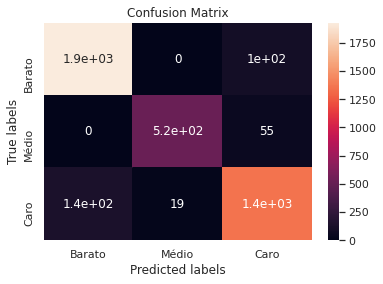

In [ ]:
#Métricas de Avaliação do Modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Matriz de Confusão para checagem visual de acertos de classificação
confMatrix = confusion_matrix(ytest, predict)
ax= plt.subplot()
sns.heatmap(confMatrix, annot=True, ax = ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Barato', 'Médio', 'Caro']); ax.yaxis.set_ticklabels(['Barato', 'Médio', 'Caro']);

#Portanto é possível ver que em comparação aos acertos, não errou tanto assim, podendo melhorar o modelo até com ajuste de parâmetros

In [ ]:
#Validação Cruzada com 10 iterações. Cada uma tem uma pontuação e ao final é tirada a média delas.

from sklearn.model_selection import cross_val_score
resultado = cross_val_score(modelKNN, xtest, ytest, cv = 10)
print(resultado.mean())

0.8871135898822258


In [ ]:
#Acurácia para avaliação, mas não pode confiar apenas na acurácia, é necessário também outros tipos de métrica.
from sklearn import metrics
acuracia = metrics.accuracy_score(ytest, predict) 
acuracia

0.9239341085271318

In [ ]:
#Com essa função do relatório da classificação é possível ter acesso à vários meios de avaliação para CADA classe, sendo bem detalhado
#Há precisão, recall/sensibilidade (muito importante nesse tipo de classificação, pois checa de fato todos os verdadeiros positivos), f1 score(media harmonica entre a precisao e a sensibilidade).

print("Relatório de Classificação: \n", classification_report(ytest, predict)) 

Relatório de Classificação: 
               precision    recall  f1-score   support

      barato       0.93      0.95      0.94      2031
        caro       0.97      0.91      0.93       580
       médio       0.90      0.90      0.90      1517

    accuracy                           0.92      4128
   macro avg       0.93      0.92      0.92      4128
weighted avg       0.92      0.92      0.92      4128



In [ ]:
from sklearn.externals import joblib

joblib.dump(modelKNN, 'model.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model.pkl']

In [ ]:
ls


model.pkl  sample_data/


In [ ]:
import pickle

In [ ]:
filename = 'model1.pkl'

In [ ]:
outfile = open(filename, 'wb')

In [ ]:
pickle.dump(modelKNN, outfile)

In [ ]:
ls

model1.pkl  model.pkl  sample_data/


***
### Questão 8:  PCA
##### Descreva de maneira suscinta e objetiva o funcionamento do algorítmo PCA e suas utilidades

In [ ]:
# R:
# O PCA é um algoritmo de redução de dimensionalidade em que diminui a quantidade de variáveis necessárias para associar a um registro, criando
#novas variáveis (eixos principais) para tal. O número dessas variáveis é igual ao número das variáveis originais, porém geralmente serão usados
#apenas os primeiros eixos que juntos, conseguem explicar uma enorme parte de todas as variáveis originais. Os eixos combinados posicionam o registro no novo gráfico formado.
# O primeiro passo do algoritmo é fazer a normalização dos dados, pois estes, podem ter escalas diferentes e para o PCA, é necessário que os dados
#tenham o mesmo peso. Caso a forma de normalização seja por Z-score, então antes é necessário calcular a média e o desvio padrão das variáveis para
#aplicar a fórmula. Para confirmar se foi normalizado direito é só calcular a média e desvio padrão novamente. Eles precisam resultar em 0 e 1, respectivamente.
# Após isso, é preciso calcular a matriz de covariância dos dados normalizados.
#Como o objetivo é com os eixos, encontrar um plano ortogonal entre as variáveis que resulte na maior variância possível dos dados originais, será calculado os autovetores e
#autovalores dessa matriz de covariância que foi encontrada. Dessa forma, os componentes principais são representados por esses autovetores que normalizados, fica bem melhor de
#fazer a comparação.
#Após isso há a criação desse novo plano, plotando os pontos vetores em tuplas (x,y) que são (autovalores, componentes principais dimensionada para esse autovalor).
#Dessa forma, é possível entender que os dados não mudam, o que muda é apenas o plano que eles estavam inseridos. Em outras palavras, é a visualização dos mesmos dados em um
#ângulo diferente, com perspectiva diferentes e mais intuitivas para análise.

### Questão 9: Equações de Bellman
##### Explique com suas palavras de maneira detalhada as equações de Bellman.
***

In [ ]:
# R:
#São equações utilizadas em Aprendizado por Reforço baseadas em estados(s), ações (a), recompensas(R) e descontos(Y). O problema que essa equação resolve é a estimativa de uma recompensa máxima,
#ou seja, dado um determinado estado atual, caso seja feito a melhor escolha de ação agora e em todos os outros momentos, qual seria a recompensa máxima que seria retornado a partir disso?
#A equação mais básica é dada por: V(s) = MAXa(R(s,a) + γV(s')).
#V(s) representa o valor para estar em um determinado estado.
#R(s,a) indica uma recompensa baseada em uma ação, ou seja. Dada uma ação a, o agente irá para um estado s e ganhará uma recompensa R.
#MAXa representa a ação dentre todas as ações possíveis que resulte no maior valor para o agente no próximo estado. Nesse caso, a ação a que gere a maior recompensa.
#s' representa o estado seguinte, ou seja, V(s') são os valores dos possíveis estados seguintes.
#γ representa o fator de desconto. Esse fator multiplicativo serve para que os estados não fiquem com o mesmo valor e na hora de escolher o próximo, optar pelo que tenha o maior valor.

#Como a equação de bellman calcula o valor de um estado ótimo, então, caso um agente tenha várias opções de ação, terá que ser calculada várias equações de bellman e checar o que resulta no maior valor.
#O cálculo é feito de forma recursiva até que todos os estados possuam valores e assim o agente conseguir ir pelo caminho com maiores valores que geram a maior recompensa (ações ótimas).


### Questão 10: Attention Model

###### Explique com suas palavras o funcionamento de um Attention Model.

In [ ]:
# R:
# Os modelos atencionais surgiram com o objetivo de melhorar ainda mais as redes neurais profundas e são baseadas nesse mecanismo biológico que todo ser vivo possui. Este, atua selecionando
#apenas as informações mais importantes para atingir um objetivo. Dessa forma, tendo isso cocmo inspiração, esses modelos tentam reproduzir esse mecanismo nas redes neurais e aproximar
#de um pensamento mais humano. Ou seja, as redes neurais por si só já foram capazes de solucinar um grande número de problemas que uma máquina não conseguia, porém, em alguns problemas
#específicos como a tradução automática (a primeira abordagem - self attention - na área de Processamento de Linguagem Natural com Redes Neurais Recorrentes), a rede se tornava bastante ineficiente quando a entrada era grande. Isso ocorria porque 
#as redes definiam um valor fixo tanto para a entrada como para a saída. Contudo, como nas diferentes linguas nem sempre uma expressão ou frase possui a mesma quantidade de palavras, se tornou
#um problema, pois a rede é do tipo encoder-decoder(a camada encoder processa os dados de entrada e os comprime em um vetor de contexto de tamanho definido). Esse vetor de contexto estático e é usado
#gerar os dados de saída em relação a todos os dados de entrada de uma vez só, nesse caso, traduzir todas as palavras de uma frase de uma vez. É nesse momento que um modelo atencional é útil,
#pois com ele seria possível tornar esse vetor de contexto dinâmico e fazer a camada decoder prestar atenção em diferentes partes dos dados de entrada ao mesmo tempo que produz os dados de saída, 
#não analisando a frase/dados como um todo mas sim, várias partes dela, conseguindo também atribuir um grau de importância para cada parte em seus pesos.

# Cada parte da sequência de entrada terá um peso de atenção associado que indica o quanto essa parte foi utilizada na geração da saída, ou seja, quanto maior o peso do componente, mais
#importância ele teve. A fórmula para o cálculo desses pesos é baseada em 'scores de atenção' calculados por uma rede neural simples. Após isso é passado por uma normalização (para serem de fato, probabilidades) e, através de uma
#soma ponderada entre os estados e seus pesos é gerado o vetor de contexto que deixou de ser fixo e passou a ser calculado para cada palavra/dado da entrada. E só assim a etapa de saída do tempo atual
#pode ser decodificada, sendo concatenada à saída anterior e repetindo o processo. Dessa forma, a saída agora é resultante de uma combinação de todos os estados de entrada.

#Há alguma variações em relação a construção do modelo e cálculos, mas em geral segue essa perspectiva explicada. Além disso, este tipo de conhecimento vem sendo abordada não só em processamento
#de linguagem natural mas em diversas outras áreas, como visão computacional, a fim de diminuir esse problema da longa sequência de dados de entrada.

 